In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

import warnings

In [3]:
warnings.filterwarnings('ignore')

# Reading Data

In [4]:
data=pd.read_excel(r"D:\Courses\3 - Deep Learning\Session 4\Telco_customer_churn.xlsx")
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
data.drop(['CustomerID','Churn Label','Count','Country','State','Zip Code','Lat Long','City'],axis=1,inplace=True)

In [7]:
data.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,86,5372,Moved
3,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved
4,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,89,5340,Competitor had better devices


In [8]:
data['Contract']

0       Month-to-month
1       Month-to-month
2       Month-to-month
3       Month-to-month
4       Month-to-month
             ...      
7038          Two year
7039          One year
7040          One year
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Contract']=le.fit_transform(data['Contract'])

In [10]:
data['Contract']

0       0
1       0
2       0
3       0
4       0
       ..
7038    2
7039    1
7040    1
7041    0
7042    2
Name: Contract, Length: 7043, dtype: int32

In [11]:
data['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [12]:
data['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [13]:
data[data['Churn Value']==0].head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
1869,33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,...,No,0,Yes,Electronic check,29.85,29.85,0,27,3964,NaN
1870,33.949255,-118.246978,Male,No,No,No,34,Yes,No,DSL,...,No,1,No,Mailed check,56.95,1889.5,0,61,3441,NaN
1871,34.076259,-118.310715,Male,No,No,No,45,No,No phone service,DSL,...,No,1,No,Bank transfer (automatic),42.30,1840.75,0,66,4307,NaN
1872,34.027337,-118.285150,Male,No,No,Yes,22,Yes,Yes,Fiber optic,...,No,0,Yes,Credit card (automatic),89.10,1949.4,0,43,4459,NaN
1873,34.008293,-118.346766,Female,No,No,No,10,No,No phone service,DSL,...,No,0,No,Mailed check,29.75,301.9,0,51,2013,NaN


Notice Churn Reason is NaN. We should set it to something

In [14]:
data['Churn Reason'].fillna("didn't leave",inplace=True)

In [15]:
data['Total Charges']

0        108.15
1        151.65
2         820.5
3       3046.05
4        5036.3
         ...   
7038     1419.4
7039     1990.5
7040     7362.9
7041     346.45
7042     6844.5
Name: Total Charges, Length: 7043, dtype: object

In [16]:
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

errors='coerce' is set, invalid parsing will be set as NaN (Not a Number). This means that if there are any values in the 'Total Charges' column that cannot be converted to numeric type, Pandas will replace them with NaN.

In [17]:
data['Total Charges'].isna().sum()

11

In [18]:
data['Total Charges'].fillna(data['Total Charges'].mean(),inplace=True)

In [19]:
data

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,0,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,0,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,Yes,0,Yes,Electronic check,99.65,820.50,1,86,5372,Moved
3,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,0,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved
4,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,Yes,0,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,...,No internet service,2,Yes,Bank transfer (automatic),21.15,1419.40,0,45,5306,didn't leave
7039,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,...,Yes,1,Yes,Mailed check,84.80,1990.50,0,59,2140,didn't leave
7040,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,1,Yes,Credit card (automatic),103.20,7362.90,0,71,5560,didn't leave
7041,34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,...,No,0,Yes,Electronic check,29.60,346.45,0,59,2793,didn't leave


In [20]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,Latitude,Longitude,Tenure Months,Contract,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Male,...,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction,Churn Reason_didn't leave
0,33.964131,-118.272783,2,0,53.85,108.15,1,86,3239,True,...,False,False,False,False,False,False,False,False,False,False
1,34.059281,-118.307420,2,0,70.70,151.65,1,67,2701,False,...,False,False,True,False,False,False,False,False,False,False
2,34.048013,-118.293953,8,0,99.65,820.50,1,86,5372,False,...,False,False,True,False,False,False,False,False,False,False
3,34.062125,-118.315709,28,0,104.80,3046.05,1,84,5003,False,...,False,False,True,False,False,False,False,False,False,False
4,34.039224,-118.266293,49,0,103.70,5036.30,1,89,5340,True,...,False,False,False,False,False,False,False,False,False,False


In [21]:
X=data.drop(['Churn Value'],axis=1).values
y=data['Churn Value'].values

In [22]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [23]:
#fearture scaling 
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()



train_X=sd.fit_transform(train_X)
test_X=sd.transform(test_X)

# Model

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [79]:
model=Sequential()
model.add(Dense(50,activation='relu',input_shape=(train_X.shape[1],)))

model.add(Dense(30,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_5"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 50)                2700      
                                                                 
 dense_16 (Dense)            (None, 30)                1530      
                                                                 
 dense_17 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4261 (16.64 KB)
Trainable params: 4261 (16.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
model.compile(optimizer='SGD', loss='binary_crossentropy',metrics=['accuracy'])

In [81]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True)

In [82]:
history=model.fit(train_X,train_y,validation_split=0.1,batch_size=128,epochs=20, callbacks=[early_stopping])

Epoch 1/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6255 - accuracy: 0.6254 - val_loss: 0.5632 - val_accuracy: 0.7234
Epoch 2/20
40/40 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7986 - val_loss: 0.4458 - val_accuracy: 0.8103
Epoch 3/20
40/40 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.8844 - val_loss: 0.3559 - val_accuracy: 0.9007
Epoch 4/20
40/40 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.9333 - val_loss: 0.2855 - val_accuracy: 0.9326
Epoch 5/20
40/40 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.9600 - val_loss: 0.2296 - val_accuracy: 0.9574
Epoch 6/20
40/40 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9720 - val_loss: 0.1862 - val_accuracy: 0.9645
Epoch 7/20
40/40 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9799 - val_loss: 0.1522 - val_accuracy: 0.9787
Epoch 8/20
40/40 [==

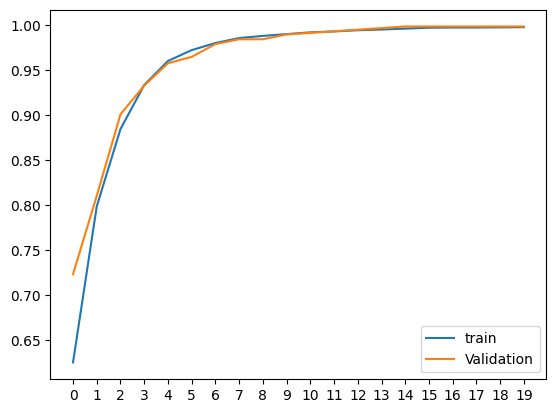

In [90]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.xticks(np.arange(20))
plt.legend()
plt.show()

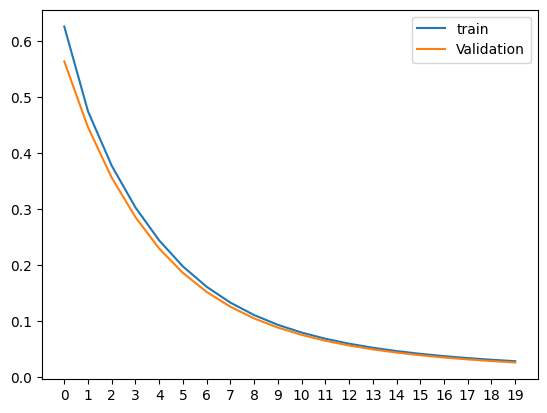

In [87]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='Validation')
plt.xticks(np.arange(20))
plt.legend()
plt.show()

In [88]:
loss, accuracy = model.evaluate(test_X,test_y)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

45/45 [==============================] - 0s 752us/step - loss: 0.0268 - accuracy: 0.9979
Loss: 0.02683986909687519
Accuracy: 0.9978708028793335
